In [1]:
## import necessary libraries

import pandas as pd
import numpy as np

# data visulatization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
#pip install xgboost

In [3]:
## Read dataset

df = pd.read_excel('Capstone Project (3).xlsx')

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [ ]:
## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.isna().sum()  ## nil null

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
sorted(df.columns)

['age',
 'ash',
 'cement',
 'coarseagg',
 'fineagg',
 'slag',
 'strength',
 'superplastic',
 'water']

In [9]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [11]:
df.kurt()

cement          -0.520652
slag            -0.508175
ash             -1.328746
water            0.122082
superplastic     1.411269
coarseagg       -0.599016
fineagg         -0.102177
age             12.168989
strength        -0.313725
dtype: float64

In [64]:
## Outlier detection

<Axes: >

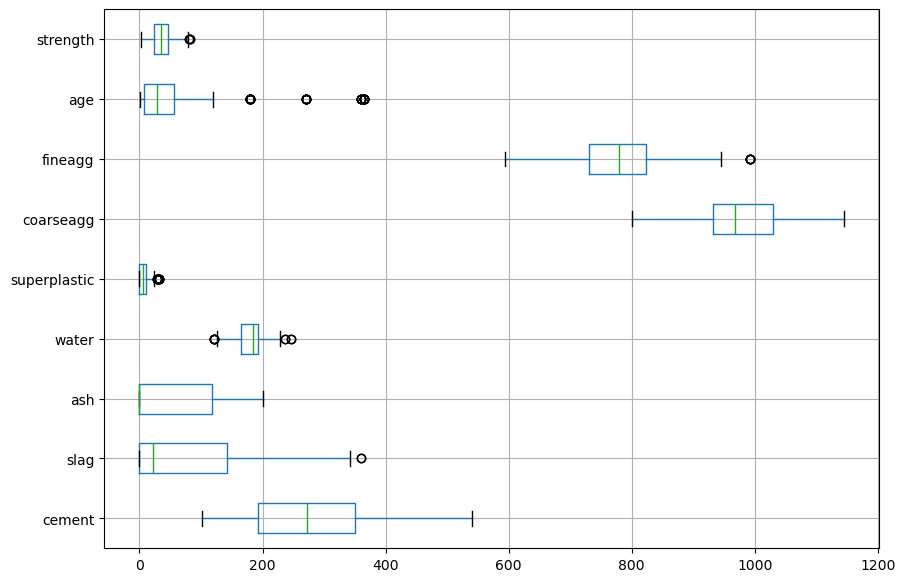

In [12]:
plt.figure(figsize = (10,7))
df.boxplot(vert = False)

In [13]:
##remove outlier

def remove_outlier(col):
    q1,q3 = np.percentile(col, [20,70])
    IQR = q3 - q1
    LW = q1 - (1.5*IQR)
    UW = q3 + (1.5*IQR)
    return LW, UW

In [14]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [65]:
## Outlier removal

In [15]:
for column in df.drop(['strength'], axis = 1).columns:
    LW, UW = remove_outlier(df[column])
    df[column] = np.where(df[column] > UW , UW, df[column])
    df[column] = np.where(df[column] < LW, LW, df[column])

<Axes: >

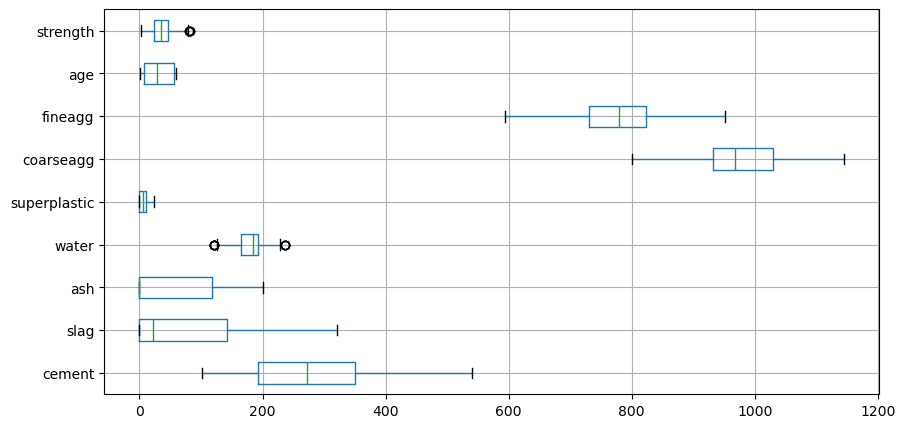

In [16]:
plt.figure(figsize = (10,5))
df.boxplot(vert = False)

In [17]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275756,-0.397467,-0.081412,0.074961,-0.109349,-0.226283,0.016357,0.497832
slag,-0.275756,1.000000,-0.323771,0.107517,0.046080,-0.284707,-0.283281,-0.033916,0.135696
ash,-0.397467,-0.323771,1.000000,-0.257887,0.400685,-0.009961,0.081671,0.007907,-0.105755
water,-0.081412,0.107517,-0.257887,1.000000,-0.663359,-0.181362,-0.447355,0.081399,-0.289988
superplastic,0.074961,0.046080,0.400685,-0.663359,1.000000,-0.259821,0.214032,0.005783,0.366232
coarseagg,-0.109349,-0.284707,-0.009961,-0.181362,-0.259821,1.000000,-0.175757,-0.021041,-0.164935
fineagg,-0.226283,-0.283281,0.081671,-0.447355,0.214032,-0.175757,1.000000,-0.051402,-0.170468
age,0.016357,-0.033916,0.007907,0.081399,0.005783,-0.021041,-0.051402,1.000000,0.575455
strength,0.497832,0.135696,-0.105755,-0.289988,0.366232,-0.164935,-0.170468,0.575455,1.000000


<Axes: >

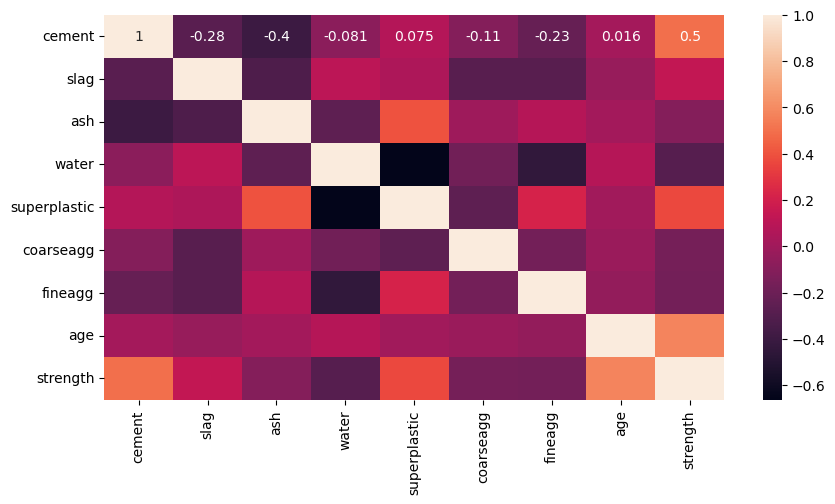

In [18]:
##Multicollinearrity Test

corr = df.corr()
df.ax = plt.subplots(figsize = (10,5))
sns.heatmap(corr, annot = True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('strength', axis = 1)
y = df['strength']

In [21]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


In [22]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 3)

In [25]:
df.shape

(1030, 9)

In [26]:
X_train.shape

(721, 8)

In [27]:
X_test.shape

(309, 8)

## Model Building

- object creation
- model fitting
- model prediction
- model evaltution

In [28]:
#from sklearn.neighbors import KNeighborsClassifier

In [29]:
#from sklearn.tree import DecisionTreeClassifier

In [30]:
#from sklearn.metrics import accuracy_score

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
r2_score(y_pred, y_test)

0.7272016492855258

In [37]:
mean_squared_error(y_pred, y_test)

60.430068770172255

In [38]:
model1 = Lasso()

In [39]:
model1.fit(X_train, y_train)

Lasso()

In [40]:
y_pred = model1.predict(X_test)

In [41]:
r2_score(y_pred, y_test)

0.7242793565801424

In [42]:
mean_squared_error(y_pred, y_test)

60.561745534187914

In [43]:
model2 = Ridge()

In [44]:
model2.fit(X_train, y_train)

Ridge()

In [45]:
y_pred = model2.predict(X_test)

In [46]:
r2_score(y_pred, y_test)

0.7272007828008513

In [47]:
## data standardisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [48]:
X

array([[-1.33901711,  1.60931332, -0.84714393, ..., -0.01439767,
        -0.31242887, -0.07856363],
       [-1.07479007, -0.36770807,  1.09607803, ...,  1.38814131,
         0.28643904, -0.780042  ],
       [-0.29838379, -0.85905261,  0.64896501, ..., -0.20612089,
         1.10250643, -0.07856363],
       ...,
       [-0.04564488,  0.49156271,  0.56454507, ..., -1.32300514,
        -0.06384219, -0.07856363],
       [ 0.58237302, -0.41660966, -0.84714393, ..., -0.52651741,
        -1.29798717,  1.4997627 ],
       [ 2.47791487, -0.85905261, -0.84714393, ...,  1.9568773 ,
        -2.01361549, -1.13078119]])

In [49]:
from sklearn.svm import SVR

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
svr = SVR()

In [53]:
svr.fit(X_train, y_train)

SVR()

In [54]:
y_pred = svr.predict(X_test)

In [55]:
r2_score(y_pred, y_test)

-15.855184225148445

In [56]:
rfr = RandomForestRegressor()

In [57]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = rfr.predict(X_test)

In [59]:
r2_score(y_pred, y_test)

0.8432801506482253

In [60]:
## default linear kernal

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('R2_score:')
print(r2_score(y_test, y_pred))

R2_score:
0.7919134411280949


In [61]:
## default linear poly

svr = SVR(kernel = 'poly')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('R2_score:')
print(r2_score(y_test, y_pred))

R2_score:
0.4726834419834327


In [62]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('R2_score:')
print(r2_score(y_test, y_pred))

R2_score:
0.22252638515700796


In [63]:
svr = SVR(kernel = 'sigmoid')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('R2_score:')
print(r2_score(y_test, y_pred))

R2_score:
0.024457748310526606
